In [ ]:
import PyMca5 as mca
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

In [141]:
def plot_kmap(specfile, scan_no, rois):
    """ Only to be used within this nb for now!"""
    
    # get the scan (pymca scandata obj)
    scan = specfile[scan_no]
    # get the data (np array)
    data = scan.data()
    # get the spec indexes (list)
    index_list = scan.alllabels()
    
    fig = plt.figure(figsize=(10.,30.))
    grid = ImageGrid(fig, 111,
                    nrows_ncols=(1,3),
                    axes_pad = 0.1,
                    cbar_mode = 'single',
                    cbar_location = 'right') 
    for index, roi in enumerate(rois):
        # load data
        rawdata =  data[index_list.index(roi)]
        # normalise
        rawdata = rawdata / rawdata.max()
        # load motor positions
        motor_1 = data[index_list.index('adcX')]
        motor_2 = data[index_list.index('adcY')]
        new_shape = (int(scan.command().split()[8]), int(scan.command().split()[4]))
        # apply dimensions
        rawdata.shape, motor_1.shape, motor_2.shape = new_shape, new_shape, new_shape
        # plot it
        im = grid[index].pcolormesh(motor_1, motor_2, rawdata)
        grid[index].set_ylabel('piy')
        grid[index].set_xlabel('pix')
        grid[index].set_title('#{0}, {1}'.format(scan_no, roi))
        grid.cbar_axes[index].colorbar(im)
    # last things
    plt.show()

In [142]:
# Initialise some variables
specdir = '/users/zatterin/Documents/data/IHR_20161114/spec/'
sample_name = 'e16095'
rois = ['mpx4int', 'mpx4ro1', 'mpx4ro2']

In [143]:
# See kmap specspecfiles corresponding to specified sample name
specfiles = !ls {specdir} | grep spec | grep fast | grep -i {sample_name}
for index, fname in enumerate(specfiles): print(str(index)+'...'+str(fname))

0...20161115_E16095_fast_00011.spec
1...20161117_E16095_fast_00003.spec
2...20161117_E16095_fast_00005.spec


In [144]:
# specify filenum to inspect
i = 1

In [145]:
sf = mca.specfile.Specfile(specdir+specfiles[i])
n_scans = int(sf.list()[2:])
print('{0} --> {1} scans'.format(specfiles[i],n_scans))

20161117_E16095_fast_00003.spec --> 15 scans


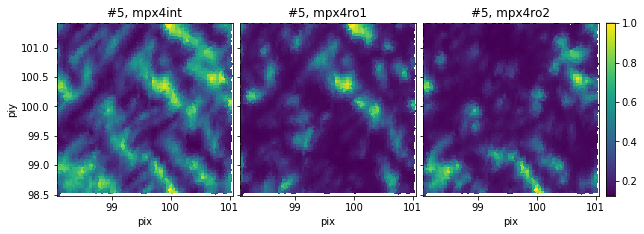

In [146]:
plot_kmap(sf, 5, rois)